# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


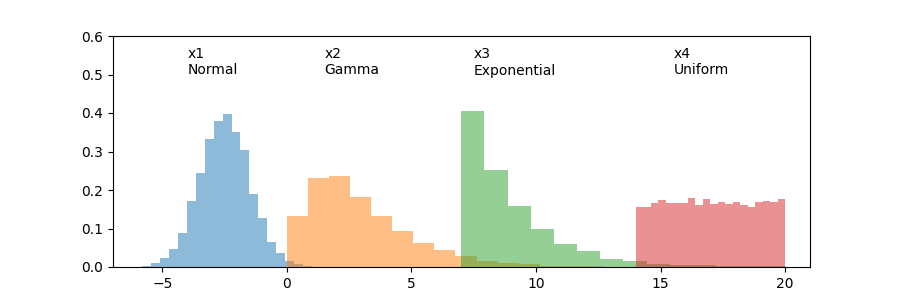

Text(15.521469882560364, 0.5, 'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

## Ways to make subplots

<IPython.core.display.Javascript object>


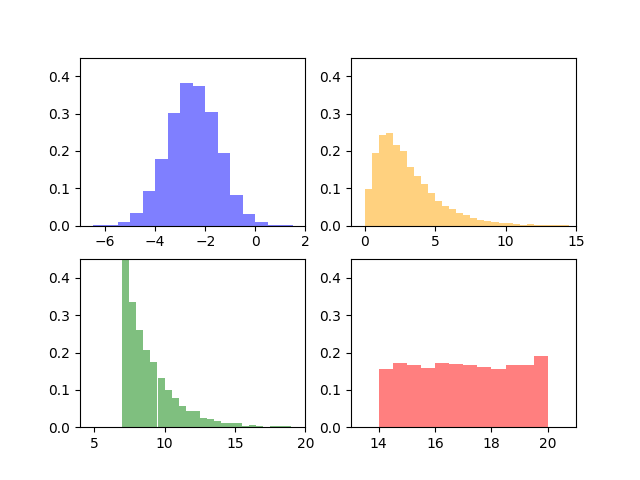

In [2]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(gspec[0, :1])
ax2 = plt.subplot(gspec[0, 1:])
ax3 = plt.subplot(gspec[1:, :1])
ax4 = plt.subplot(gspec[1:, 1:])
axs = [ax1, ax2, ax3, ax4]

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
xs = [x1, x2, x3, x4]

title = ['Normal', 'Gamma', 'Exponential', 'Uniform']
colors = ['blue', 'orange', 'green', 'red']

bin1 = np.arange(-7, 2, 0.5)
bin2 = np.arange(-1, 15, 0.5)
bin3 = np.arange(4, 20, 0.5)
bin4 = np.arange(13, 21, 0.5)
bins = [bin1, bin2, bin3, bin4]

for axi in axs:
    axi.set_ylim(0,0.45)

ax1.set_xlim(-7,2)
ax2.set_xlim(-1,15)
ax3.set_xlim(4, 20)
ax4.set_xlim(13,21)

for n in range(len(axs)):
    axs[n].hist(xs[n], density = True, bins = bins[n], alpha = 0.5, color = colors[n])

<IPython.core.display.Javascript object>


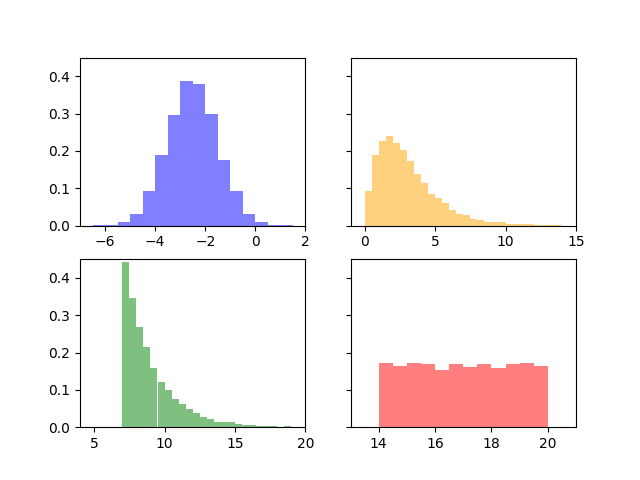

In [3]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=True)
axs = [ax1, ax2, ax3, ax4]

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
xs = [x1, x2, x3, x4]

title = ['Normal', 'Gamma', 'Exponential', 'Uniform']
colors = ['blue', 'orange', 'green', 'red']

bin1 = np.arange(-7, 2, 0.5)
bin2 = np.arange(-1, 15, 0.5)
bin3 = np.arange(4, 20, 0.5)
bin4 = np.arange(13, 21, 0.5)
bins = [bin1, bin2, bin3, bin4]

for n in range(len(axs)):
    axs[n].set_ylim(0, 0.45)
    
ax1.set_xlim(-7,2)
ax2.set_xlim(-1,15)
ax3.set_xlim(4, 20)
ax4.set_xlim(13,21)

for n in range(len(axs)):
    axs[n].hist(xs[n], density = True, bins = bins[n], alpha = 0.5, color = colors[n], label=title[n])

## Making the gif

<IPython.core.display.Javascript object>


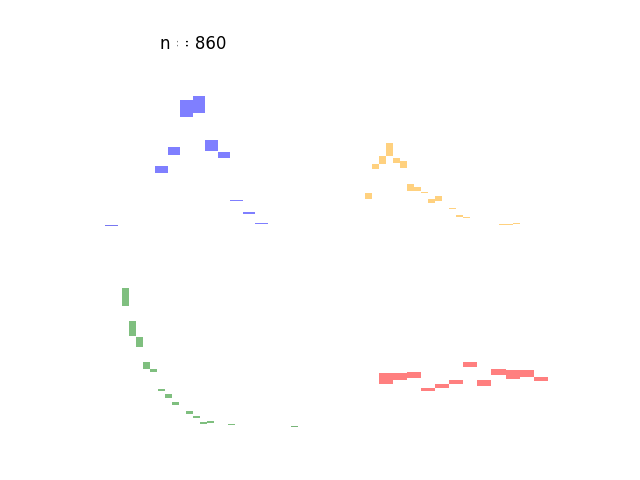

In [12]:
import matplotlib.animation as animation

n = 1000
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
xs = [x1, x2, x3, x4]

title = ['Normal', 'Gamma', 'Exponential', 'Uniform']
colors = ['blue', 'orange', 'green', 'red']

def update(curr):
    if curr == n: # this says when to stop
        a.event_source.stop()
        
    for axi in axs:
        axi.cla()
        
    ax1.axis([-7,2,0,230])
    ax2.axis([-1,15,0,230])
    ax3.axis([4,20,0,230])
    ax4.axis([13,21,0,230])
    
    bin1 = np.arange(-7, 2, 0.5)
    bin2 = np.arange(-1, 15, 0.5)
    bin3 = np.arange(6, 20, 0.5)
    bin4 = np.arange(13.5, 20.5, 0.5)
    bins = [bin1, bin2, bin3, bin4]
    
    for ii in range(len(axs)):
        axs[ii].hist(xs[ii][:curr], bins = bins[ii], alpha = 0.5, color = colors[ii], label=title[ii])
        axs[ii].legend()
    ax1.set_title('n = {}'.format(curr))

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
axs = [ax1, ax2, ax3, ax4]

a = animation.FuncAnimation(fig, update, frames=np.arange(100, 1000, 1), interval=50)
a.save('distributions.gif', fps=50)